In [1]:
# データのダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2020-04-28 23:31:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています...128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています...接続しました。
HTTP による接続要求を送信しました、応答を待っています...200 OK
長さ: 264426 (258K) [application/x-httpd-php]
`winequality-white.csv' に保存中

winequality-white.c 100%[===================>] 258.23K   500KB/s 時間 0.5s     

2020-04-28 23:31:47 (500 KB/s) - `winequality-white.csv' へ保存完了 [264426/264426]



In [4]:
import pandas as pd

# ファイルの表示
csv = pd.read_csv('winequality-white.csv', sep=';', encoding='utf-8')
csv

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ラベルとデータに分離
y = csv['quality']
x = csv.drop('quality', axis=1)
print(y)
print(x)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29 

In [6]:
# 学習用とテスト用に分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f'train = {len(x_train)}, {len(y_train)}')
print(f'test = {len(x_test)}, {len(y_test)}')

train = 3918, 3918
test = 980, 980


In [7]:
# 学習
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# 評価
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f'正解率 = {accuracy_score(y_test, y_pred)}')

precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.67      0.34      0.45        29
           5       0.73      0.67      0.70       287
           6       0.67      0.79      0.72       456
           7       0.65      0.58      0.61       167
           8       0.75      0.23      0.35        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.49      0.37      0.41       980
weighted avg       0.68      0.68      0.67       980

正解率 = 0.6826530612244898


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


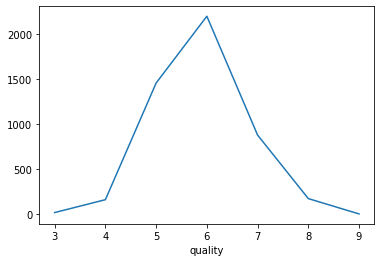

In [11]:
import matplotlib.pyplot as plt

# 品質データの個数
count_data = csv.groupby('quality')['quality'].count()
print(count_data)

count_data.plot()
plt.show()